In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X=df.drop(columns=["math score"]) 
y=df["math score"]

In [5]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [6]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
categorical_features=['gender','race/ethnicity','parental level of education','lunch','test preparation course']
numerical_features=['reading score','writing score']

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer 

categorical_transformer=OneHotEncoder(drop='first')
numerical_transformer=StandardScaler() 

preprocessor=ColumnTransformer(
    transformers=[
        ('OneHotEncoder',categorical_transformer,categorical_features),
        ('StandardScaler',numerical_transformer,numerical_features)
    ]
)

In [10]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train_transformed=preprocessor.fit_transform(X_train)
X_test_transformed=preprocessor.transform(X_test)

In [12]:
X_train_transformed.shape,X_test_transformed.shape

((800, 14), (200, 14))

In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   

models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
} 

for name,model in models.items():
    model.fit(X_train_transformed,y_train)
    y_pred=model.predict(X_test_transformed) 

    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    print(f"{name}:\n  MAE:{mae:.2f}, MSE:{mse:.2f}, R2 Score:{r2:.2f}\n")

Linear Regression:
  MAE:4.21, MSE:29.10, R2 Score:0.88

Lasso:
  MAE:5.16, MSE:42.48, R2 Score:0.83

Ridge:
  MAE:4.21, MSE:29.09, R2 Score:0.88

Support Vector Regressor:
  MAE:5.50, MSE:69.71, R2 Score:0.71

K-Neighbors Regressor:
  MAE:5.74, MSE:54.64, R2 Score:0.78

Decision Tree Regressor:
  MAE:6.38, MSE:65.45, R2 Score:0.73

Random Forest Regressor:
  MAE:4.73, MSE:36.90, R2 Score:0.85

XGBRegressor:
  MAE:5.08, MSE:42.57, R2 Score:0.83

AdaBoostRegressor:
  MAE:4.62, MSE:36.11, R2 Score:0.85



In [14]:
lr_model=LinearRegression(fit_intercept=True) 
lr_model.fit(X_train_transformed,y_train) 
y_pred_lr=lr_model.predict(X_test_transformed)
print("R-squared Score:",r2_score(y_test,y_pred_lr))

R-squared Score: 0.8804332983749565


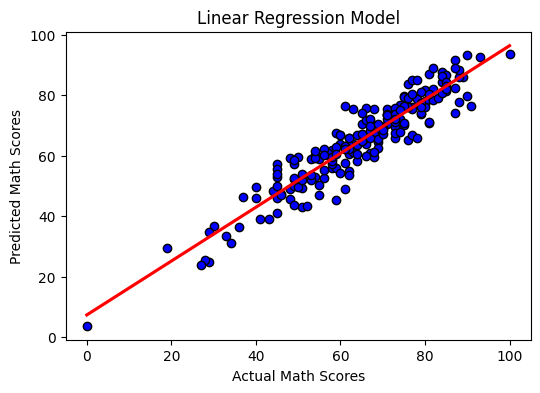

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred_lr,color='blue',edgecolors='black') 
sns.regplot(x=y_test,y=y_pred_lr,scatter=False,color='red',ci=None)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Linear Regression Model")
plt.show()